In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/zop
!ls

/content/drive/MyDrive/zop
diabetes.csv  projekt.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Exploratory data analysis

In [4]:
df = pd.read_csv('./diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
print('      Glucose missing values: ',len(df[df['Glucose'] == 0.0]))
print('BloodPressure missing values: ',len(df[df['BloodPressure'] == 0.0]))
print('SkinThickness missing values: ',len(df[df['SkinThickness'] == 0.0]))
print('          BMI missing values: ',len(df[df['BMI'] == 0.0]))

      Glucose missing values:  5
BloodPressure missing values:  35
SkinThickness missing values:  227
          BMI missing values:  11


In [9]:
mu = lambda x : df[df[x] != 0][x].mean()

df['Glucose'] = df['Glucose'].replace(to_replace=0, value=mu('Glucose'))
df['BMI'] = df['BMI'].replace(to_replace=0, value=mu('BMI'))
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0, value=mu('BloodPressure'))
df['SkinThickness'] = df['SkinThickness'].replace(to_replace=0, value=mu('SkinThickness'))

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


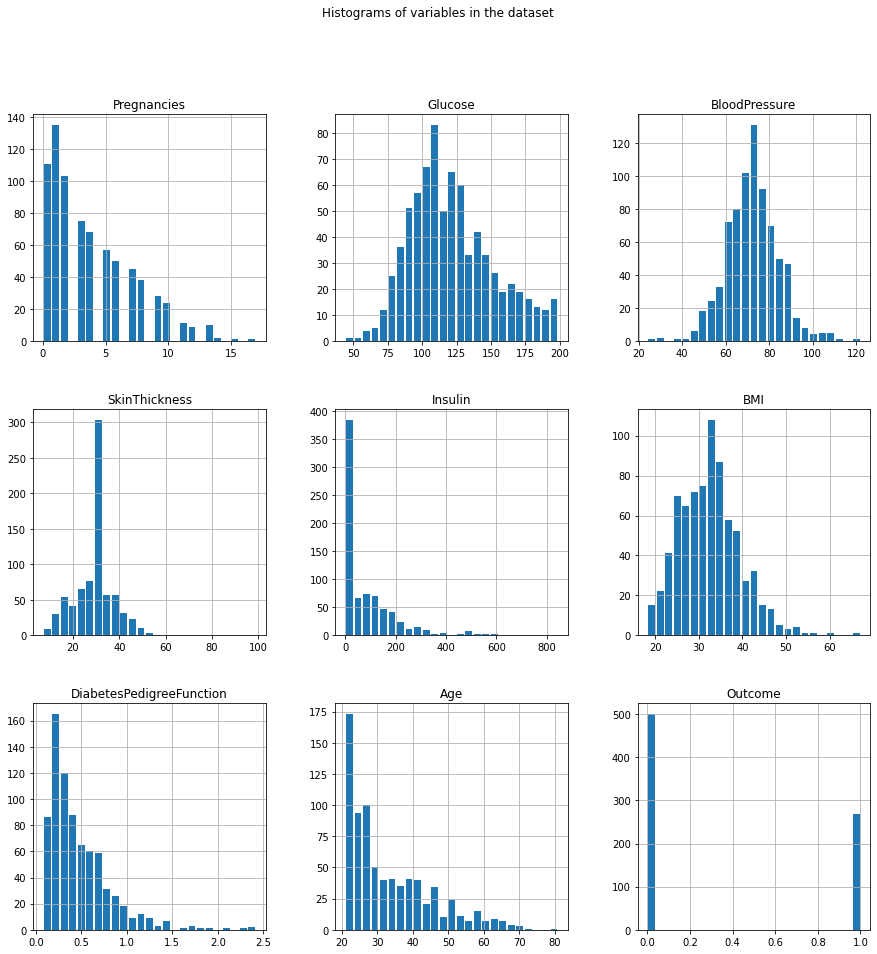

In [11]:
df.hist(bins=25, figsize=(15, 15), rwidth=0.8)
plt.suptitle('Histograms of variables in the dataset');

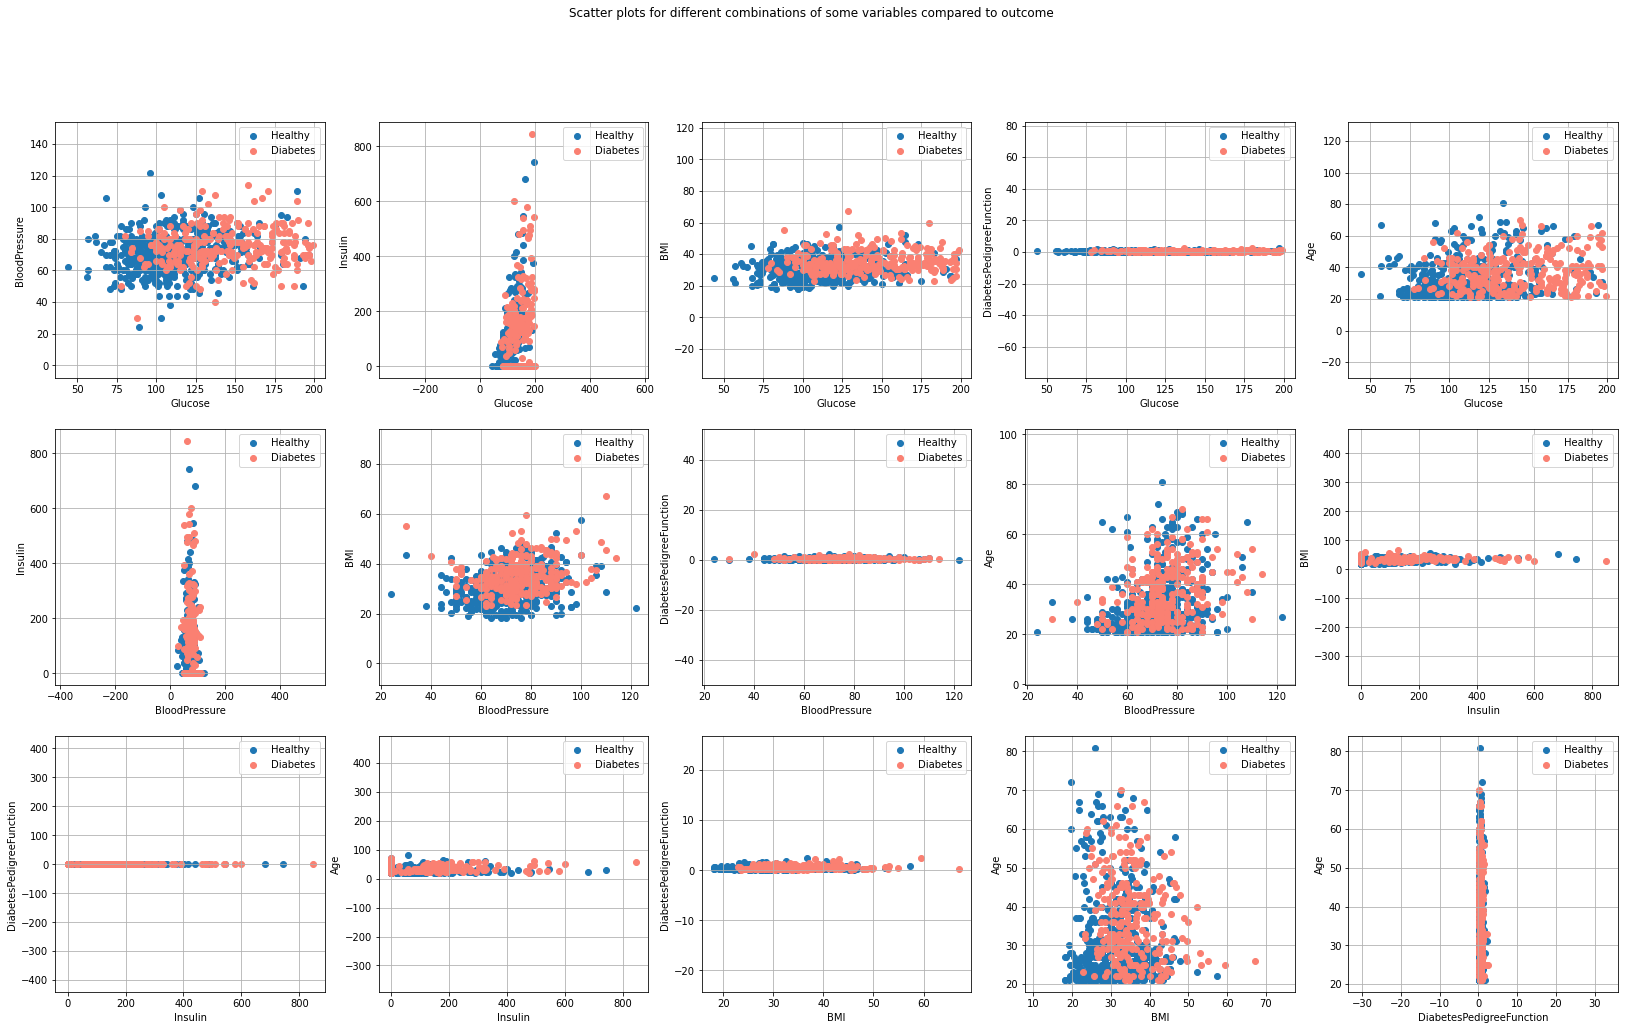

In [12]:
fig, axs = plt.subplots(3, 5, figsize=(28, 16))
axs = axs.reshape(-1)

columns = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

mask = df.Outcome == 1

k = 0
for i, _ in enumerate(columns):
    for j in range(i+1, len(columns)):
        axs[k].scatter(
            df.loc[~mask, columns[i]].to_numpy(), 
            df.loc[~mask, columns[j]].to_numpy(), 
            label='Healthy'
        )

        axs[k].scatter(
            df.loc[mask, columns[i]].to_numpy(), 
            df.loc[mask, columns[j]].to_numpy(), 
            label='Diabetes',
            c='salmon'
        )

        axs[k].set_xlabel(columns[i])
        axs[k].set_ylabel(columns[j])
        axs[k].legend()
        axs[k].grid()
        axs[k].axis('equal')
        k += 1

fig.suptitle('Scatter plots for different combinations of some variables compared to outcome')
plt.show()

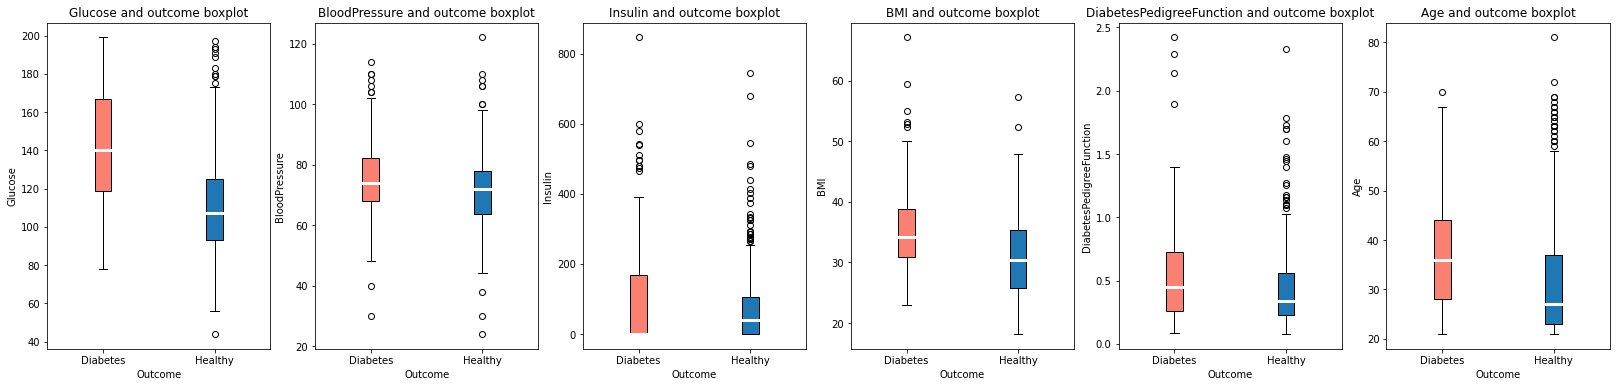

In [13]:
import warnings
warnings.filterwarnings('ignore')

d = {v: (df.loc[mask, v].tolist(), df.loc[~mask, v].tolist()) for v in columns}

fig, axs = plt.subplots(1, len(columns), figsize=(28, 6))
colors = ['salmon', 'C0']

for i, (k, v) in enumerate(d.items()):
    b = axs[i].boxplot(v, patch_artist=True, medianprops=dict(color='white', linewidth=3))
    for patch, color in zip(b['boxes'], colors):
        patch.set_facecolor(color)

    axs[i].set_xticklabels(['Diabetes', 'Healthy'])
    axs[i].set_title(columns[i] + ' and outcome boxplot')
    axs[i].set_ylabel(columns[i])
    axs[i].set_xlabel('Outcome')

plt.show()

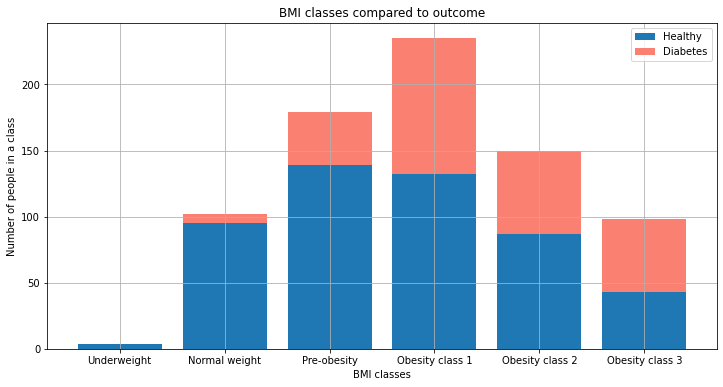

In [14]:
conditions_and_names = {
    'Underweight': df.BMI < 18.5, 
    'Normal weight': (df.BMI >= 18.5) & (df.BMI < 25), 
    'Pre-obesity': (df.BMI >= 25) & (df.BMI < 30),
    'Obesity class 1': (df.BMI >= 30) & (df.BMI < 35),
    'Obesity class 2': (df.BMI >= 35) & (df.BMI < 40),
    'Obesity class 3': df.BMI >= 40
}

plt.figure(figsize=(12, 6))
for n, c in conditions_and_names.items():
    count_df = df.loc[c].groupby('Outcome').count().iloc[:, 0].tolist()
    if (len(count_df) == 1): count_df.append(0)
    a = plt.bar(n, count_df[0], color=colors[1])
    b = plt.bar(n, count_df[1], color=colors[0], bottom=count_df[0])

plt.legend([a, b], ['Healthy', 'Diabetes'])
plt.ylabel('Number of people in a class')
plt.xlabel('BMI classes')
plt.title('BMI classes compared to outcome')
plt.grid()
plt.show()

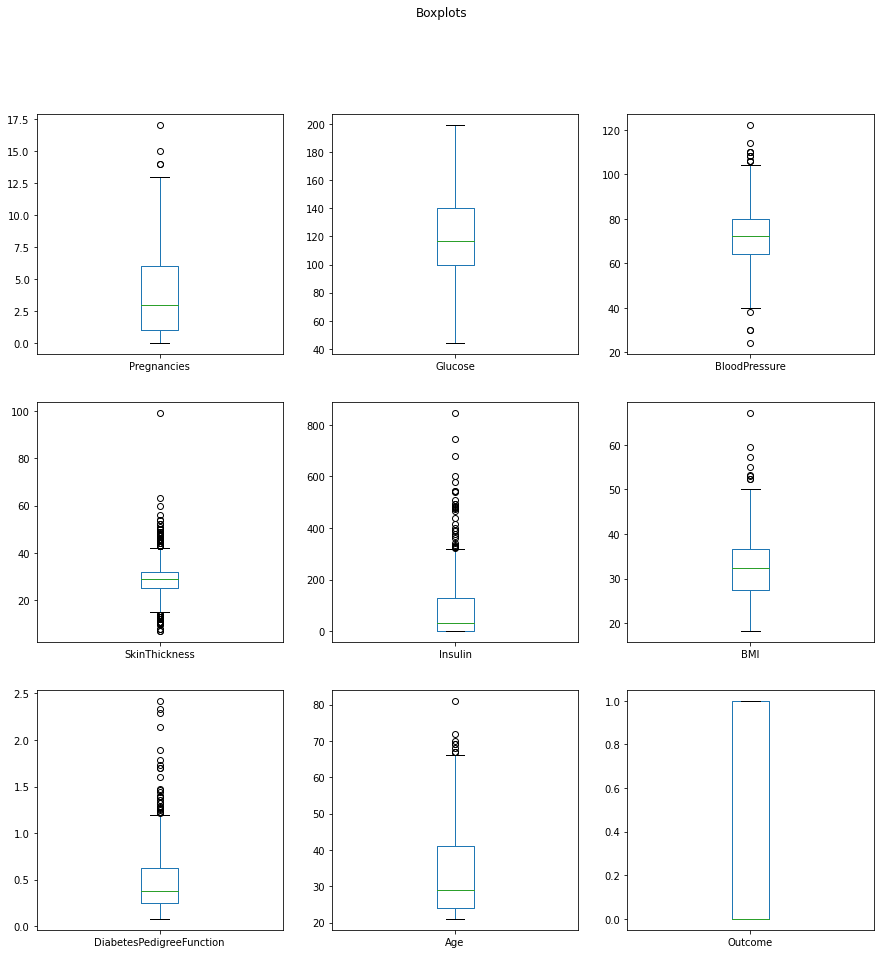

In [15]:
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False)
fig = plt.gcf()
fig.set_size_inches(15, 15)
fig.suptitle('Boxplots')
plt.show()

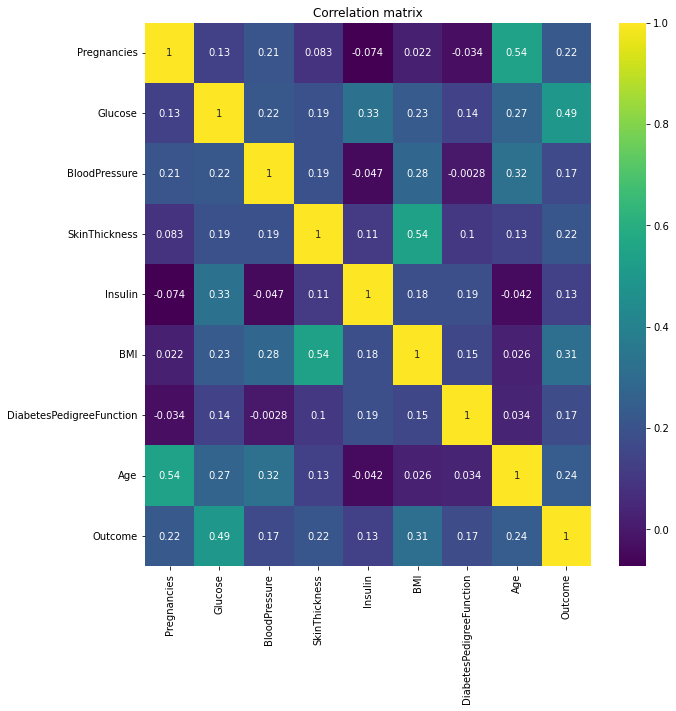

In [16]:
fig = plt.figure(figsize=(10, 10))
sb.heatmap(
    df.corr(),
    annot=True,
    cmap='viridis'
)
plt.title('Correlation matrix');

# SVM

In [17]:
X = df.drop('Outcome', axis=1)
y = df['Outcome'].to_numpy()

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

X2 = StandardScaler().fit_transform(X)
svm = SVC()
params = {
    'C':[0.01*i for i in range(1, 100)],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto']
}

grid_search = GridSearchCV(svm, params, n_jobs=4, scoring='accuracy')
grid_search.fit(X2, y)
bp1 = grid_search.best_params_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.11, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.7721925133689839


In [19]:
X2 = MinMaxScaler().fit_transform(X)
svm = SVC()
params = {
    'C':[0.01*i for i in range(1, 100)],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto']
}

grid_search = GridSearchCV(svm, params, n_jobs=4, scoring='accuracy')
grid_search.fit(X2, y)
bp2 = grid_search.best_params_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.71, 'gamma': 'scale', 'kernel': 'poly'}
0.7826075884899414


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline

def print_metrics(alg, X, y):
    train_acc, test_acc = [], []
    conf_matrix_train, conf_matrix_test = np.array([[0, 0], [0, 0]]), np.array([[0, 0], [0, 0]])

    n = 100
    for i in range(n):
        model = alg()
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(x_train, y_train)
        
        y_hat_train = model.predict(x_train)
        y_hat_test = model.predict(x_test)

        conf_matrix_train += confusion_matrix(y_hat_train, y_train)
        conf_matrix_test += confusion_matrix(y_hat_test, y_test)

        train_acc.append(accuracy_score(y_hat_train, y_train))
        test_acc.append(accuracy_score(y_hat_test, y_test))

    print('Train accuracy: ', np.round(np.average(np.array(train_acc)), 3))
    print('Train confusion matrix:\n', np.round(conf_matrix_train/n, 2), '\n')

    print('Test accuracy:', np.round(np.average(np.array(test_acc)), 3))
    print('Test confusion matrix:\n', np.round(conf_matrix_test/n, 2), '\n')

    print('Train and test confusion matrix:\n', np.round(conf_matrix_train/n + conf_matrix_test/n, 2))

In [21]:
from sklearn.model_selection import train_test_split
print('Prvi model:')
f1 = lambda: make_pipeline(
    StandardScaler(),
    SVC(C=bp1['C'], kernel=bp1['kernel'], gamma=bp1['gamma'])
)
print_metrics(f1, X, y)

print('======================================================================')

f2 = lambda: make_pipeline(
    MinMaxScaler(),
    SVC(C=bp2['C'], kernel=bp2['kernel'], gamma=bp2['gamma'])
)
print('Drugi model:')
print_metrics(f2, X, y)


Prvi model:
Train accuracy:  0.763
Train confusion matrix:
 [[352.64  98.2 ]
 [ 47.51 115.65]] 

Test accuracy: 0.766
Test confusion matrix:
 [[87.73 23.95]
 [12.12 30.2 ]] 

Train and test confusion matrix:
 [[440.37 122.15]
 [ 59.63 145.85]]
Drugi model:
Train accuracy:  0.802
Train confusion matrix:
 [[370.69  92.09]
 [ 29.41 121.81]] 

Test accuracy: 0.769
Test confusion matrix:
 [[90.92 26.55]
 [ 8.98 27.55]] 

Train and test confusion matrix:
 [[461.61 118.64]
 [ 38.39 149.36]]


# Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [23]:
nb = GaussianNB()
params = {
    'var_smoothing': [10**(-i) for i in range(1, 10)]
}

grid_search = GridSearchCV(nb, params, n_jobs=4, scoring='accuracy')
grid_search.fit(X, y)
bp3 = grid_search.best_params_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'var_smoothing': 0.0001}
0.7552669552669553


In [24]:
f3 = lambda: GaussianNB(var_smoothing=bp3['var_smoothing'])
print_metrics(f3, X, y)

Train accuracy:  0.756
Train confusion matrix:
 [[336.28  85.59]
 [ 64.07 128.06]] 

Test accuracy: 0.749
Test confusion matrix:
 [[83.23 22.3 ]
 [16.42 32.05]] 

Train and test confusion matrix:
 [[419.51 107.89]
 [ 80.49 160.11]]


# Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 50)),
    'ccp_alpha': list(range(10))
}

grid_search = GridSearchCV(dtc, params, scoring='accuracy')
grid_search.fit(X, y)
bp4 = grid_search.best_params_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}
0.7552924199983023


In [27]:
f4 = lambda: DecisionTreeClassifier(criterion=bp4['criterion'], max_depth=bp4['max_depth'], splitter=bp4['splitter'], ccp_alpha=bp4['ccp_alpha'])
print_metrics(f4, X, y)

Train accuracy:  0.792
Train confusion matrix:
 [[357.86  85.6 ]
 [ 41.85 128.69]] 

Test accuracy: 0.728
Test confusion matrix:
 [[85.22 26.75]
 [15.07 26.96]] 

Train and test confusion matrix:
 [[443.08 112.35]
 [ 56.92 155.65]]


# Accuracy measures

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def print_accuracy_measures(alg, X, y):
    n = 100
    prec, rec, f, acc, roc = [], [], [], [], []
    for i in range(n):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = alg()
        model.fit(x_train, y_train)
        y_hat_test = model.predict(x_test)
        
        prec.append(precision_score(y_hat_test, y_test))
        rec.append(recall_score(y_hat_test, y_test))
        f.append(f1_score(y_hat_test, y_test))
        acc.append(accuracy_score(y_hat_test, y_test))
        roc.append(roc_auc_score(y_hat_test, y_test))

    d = {
         'Precision': np.average(np.array(prec)),
         'Recall': np.average(np.array(rec)),
         'F-measure': np.average(np.array(f)),
         'Accuracy': np.average(np.array(acc)),
         'AUC': np.average(np.array(roc))
    }
    for name, value in d.items():
        print('{:>20s}: {:.3f}'.format(name, value))
    print()

    return d

print('SVM:')
svm_dict = print_accuracy_measures(f2, X, y)

print('Naive Bayes classifier:')
gnb_dict = print_accuracy_measures(f3, X, y)

print('Decision tree classifier:')
dtc_dict = print_accuracy_measures(f4, X, y)

SVM:
           Precision: 0.517
              Recall: 0.734
           F-measure: 0.603
            Accuracy: 0.768
                 AUC: 0.757

Naive Bayes classifier:
           Precision: 0.600
              Recall: 0.654
           F-measure: 0.623
            Accuracy: 0.750
                 AUC: 0.725

Decision tree classifier:
           Precision: 0.520
              Recall: 0.648
           F-measure: 0.566
            Accuracy: 0.728
                 AUC: 0.707



In [29]:
cci = 'Correctly Classified Instances'
ici = 'Incorrectly Classified Instances'

def print_correct_and_incorrect(alg, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    n = 100

    c = np.array([[0, 0], [0, 0]])
    for i in range(n):
        model = alg()
        model.fit(x_train, y_train)
        y_hat = model.predict(X)
        c += confusion_matrix(y, y_hat)

    c = c/n
    print('{:>35s}: {}'.format(cci, c[0][0] + c[1][1]))
    print('{:>35s}: {}'.format(ici, c[1][0] + c[0][1]))
    print()
    return c

print('SVM:')
svm_c = print_correct_and_incorrect(f2, X, y)

print('Naive Bayes classifier:')
gnb_c = print_correct_and_incorrect(f3, X, y)

print('Decision tree classifier:')
dtc_c = print_correct_and_incorrect(f4, X, y)

SVM:
     Correctly Classified Instances: 614.0
   Incorrectly Classified Instances: 154.0

Naive Bayes classifier:
     Correctly Classified Instances: 575.0
   Incorrectly Classified Instances: 193.0

Decision tree classifier:
     Correctly Classified Instances: 600.55
   Incorrectly Classified Instances: 167.45



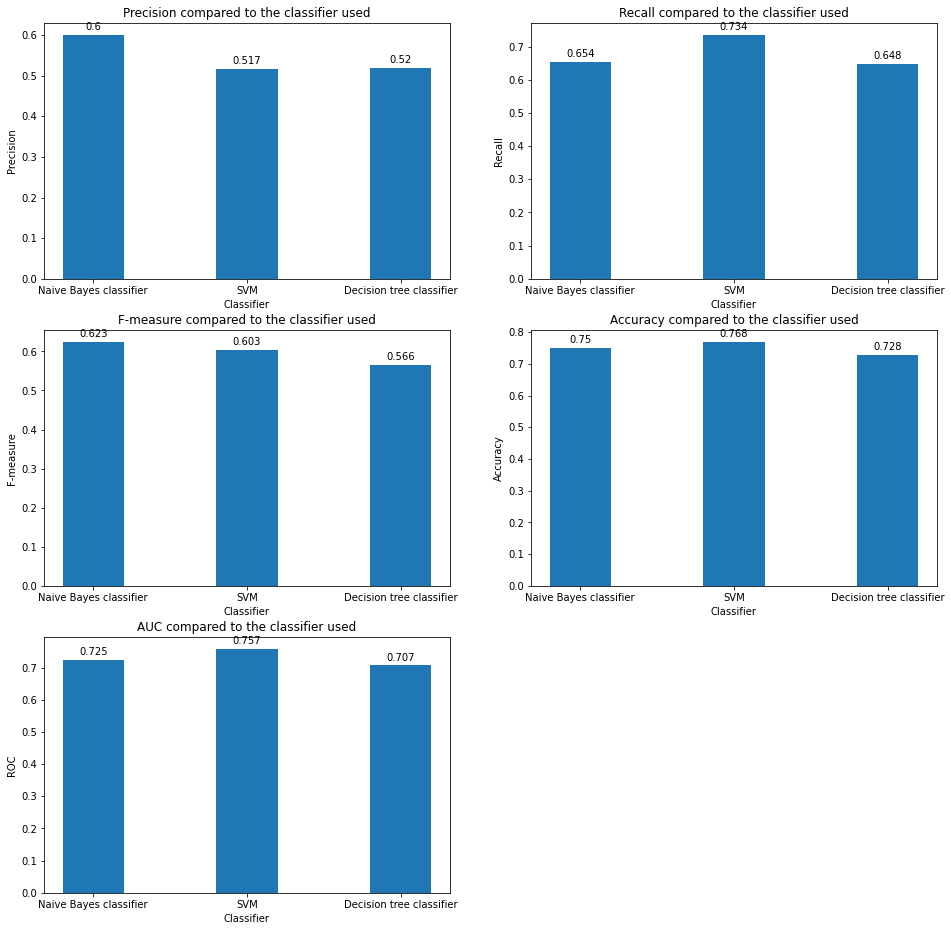

In [30]:
pr = [gnb_dict['Precision'], svm_dict['Precision'], dtc_dict['Precision']]
re = [gnb_dict['Recall'], svm_dict['Recall'], dtc_dict['Recall']]
f = [gnb_dict['F-measure'], svm_dict['F-measure'], dtc_dict['F-measure']]
acc = [gnb_dict['Accuracy'], svm_dict['Accuracy'], dtc_dict['Accuracy']]
roc = [gnb_dict['AUC'], svm_dict['AUC'], dtc_dict['AUC']]
metrics = [pr, re, f, acc, roc]
names = ['Naive Bayes classifier', 'SVM', 'Decision tree classifier']

fig, axs = plt.subplots(3, 2, figsize=(16, 16))
fig.delaxes(axs[2, 1])

metric_names = list(gnb_dict.keys())
for i in range(2):
    for j in range(2):
        rects = axs[i, j].bar(names, metrics[i*2 + j], width=0.4)
        axs[i, j].set_title(metric_names[i*2 + j] + ' compared to the classifier used')
        axs[i, j].set_xlabel('Classifier')
        axs[i, j].set_ylabel(metric_names[i*2 + j])
        axs[i, j].bar_label(rects, np.around(metrics[i*2 + j], 3), padding=3)

rects = axs[2, 0].bar(names, roc, width=0.4)
axs[2, 0].set_title('AUC compared to the classifier used')
axs[2, 0].set_xlabel('Classifier')
axs[2, 0].set_ylabel('ROC')
axs[2, 0].bar_label(rects, np.around(roc, 3), padding=3)

plt.show()

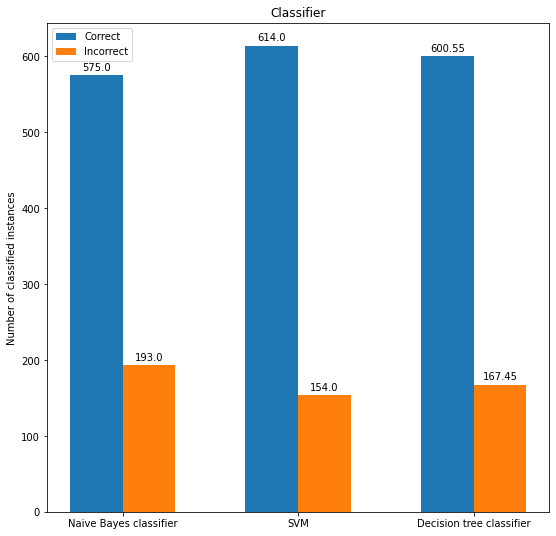

In [31]:
c_m = [
       gnb_c,
       svm_c,
       dtc_c
]

ind = np.arange(len(c_m))
correct_f = lambda c: c[1][1] + c[0][0]
incorrect_f = lambda c: c[1][0] + c[0][1]

correct = [np.round(correct_f(c_i), 2) for c_i in c_m]
incorrect = [np.round(incorrect_f(c_i), 2) for c_i in c_m]

fig, ax = plt.subplots(figsize=(9, 9))

rects1 = ax.bar(ind - 0.15, correct, 0.3, label='Correct')
rects2 = ax.bar(ind + 0.15, incorrect, 0.3, label='Incorrect')

ax.set_ylabel('Number of classified instances')
ax.set_title('Classifier')
ax.set_xticks(ind)
ax.set_xticklabels(names)
ax.legend()

ax.bar_label(rects1, correct, padding=3)
ax.bar_label(rects2, incorrect, padding=3)

plt.show()

Vrsta istraživanja u članku provedena prema:
1.  **svrsi** - primijenjeno istraživanje - motiv istraživanja je osmišljanje modela za ranu dijagnozu dijabetesa
2.   **izvoru informacija** - sekundarno istraživanje - nisu prikupljani podaci već je koišten poznati skup podataka
3.   **vremenu provedbe** - studija presjeka - promatraju se podaci u jednoj točki u vremenu
4. **načinu prikupljanja** - mješovito istraživanje - autori članka su koristili već postojeći skup podataka o ovoj temi, no koriste znanstvene metode kao što su razni prediktivni modeli za uspostavljanje odnosa između varijabli
5. **vrsti korištenih podataka** - kvantitativno istraživanje - skup podataka koji se koristi sadrži numeričke vrijednosti pomoću kojih se treniraju modeli
6. **stupnju manipulacije podacima** - promatračko istraživanje - promatraju se varijable dostupne iz prirode bez ikakvog utjecaja
7. **dubini** - korelacijsko istraživanje - autori pokušavaju pronaći povezanost između ulaznih varijabli i dijagnoze dijabetesa
8. **vrsti zaključka** - hipotetičko-deduktivno istraživanje - promatraju se podaci iz stvarnog života pomoću kojih se postavlja hipoteza o dijagnozi dijabetesa koja se može odbaciti na temelju konačne provjere

Metode prikupljanja podataka:
1.   **Opservacijsko istraživanje (sistematsko)** - mjere se stvarne vrijednosti značajki kao što su krvni tlak i razina glukoze u krvi, minimalna interakcija sa sudionicima

Etičnost provedbe istraživanja:
1. Podaci su prikupljeni na etičan način. 
2. Unatoč tome što je koristan za testiranje raznih algoritama strojnog učenja, problemi s privatnošću podataka su veliki. Koriste se mnoge osobne informacije, sudionicima istraživanja nije rečeno koliko dugo će se njihovi podaci koristiti i da će biti javni.
